<a href="https://colab.research.google.com/github/satyaabdul/Deep-Learning/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

**Image Classification**


1.   **RNN**
2.   **LSTM**
3.   **GRU** 
4.   **Bidirectional LSTM**




---
## **Persiapan Data**


In [3]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [4]:
#data yang digunakan cifar10
#klasifikasi gambar dengan 10 kelas
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ubah class vectors ke binary vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#print train dan test shape
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


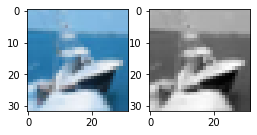

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def grayscale(data, dtype='float32'):
    # convert RGB ke luma grayscale
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # dimensi channel
    rst = np.expand_dims(rst, axis=3)
    return rst

#definisikan x train dan test yang sudah di ubah menjadi grayscale
x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

# deskripsikan chanelnya cuma 1
img_channels = 1

# coba plot gambar indeks ke-
img = 8
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(x_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(x_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()
#kelas gambar
#1)airplane 2)automobile 3)bird 4)cat 5)deer 6)dog 7)frog 8)horse 9)ship 10)truck
print(y_train[img])

In [6]:
from sklearn.model_selection import train_test_split

#split data ke data train menjadi data train dan validasi  dari x_train_gray
x_train_gray, x_val_gray, y_train, y_val = train_test_split(x_train_gray, y_train, test_size=0.2, random_state=0)

#print ukuran 
print('x_train_gray shape:', x_train_gray.shape)
print('x_val_gray shape:', x_val_gray.shape)

x_train_gray shape: (40000, 32, 32, 1)
x_val_gray shape: (10000, 32, 32, 1)




---

## **Deep Learning - RNN**



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Flatten,Embedding

#proses sequential
model_RNN = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_RNN.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_RNN.add(Embedding(10000, 32))
#gunakan RNN dengan 32 neuron/memory
model_RNN.add(SimpleRNN(32))
#hiden layers dengan 64 neuron/memory
model_RNN.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_RNN.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_RNN.add(Dense(10,activation='softmax'))
#compile model
model_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history RNN
hist_RNN = model_RNN.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_RNN.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 75s 2ms/sample - loss: 2.2965 - acc: 0.1154 - val_loss: 2.2899 - val_acc: 0.1266
Epoch 2/6
40000/40000 [==============================] - 74s 2ms/sample - loss: 2.2642 - acc: 0.1465 - val_loss: 2.2363 - val_acc: 0.1670
Epoch 3/6
40000/40000 [==============================] - 75s 2ms/sample - loss: 2.2488 - acc: 0.1572 - val_loss: 2.2486 - val_acc: 0.1641
Epoch 4/6
40000/40000 [==============================] - 75s 2ms/sample - loss: 2.2639 - acc: 0.1470 - val_loss: 2.2758 - val_acc: 0.1357
Epoch 5/6
40000/40000 [==============================] - 75s 2ms/sample - loss: 2.2605 - acc: 0.1503 - val_loss: 2.2501 - val_acc: 0.1537
Epoch 6/6
40000/40000 [==============================] - 74s 2ms/sample - loss: 2.2453 - acc: 0.1614 - val_loss: 2.2409 - val_acc: 0.1617


In [14]:
#print akurasi dan loss RNN
loss_RNN, acc_RNN = model_RNN.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

Accuracy: 16.94 %
Loss: 224.02 %




---
## **Deep Learning - LSTM**


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten,Embedding

#proses sequential
model_LSTM = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_LSTM.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_LSTM.add(Embedding(10000, 32))
#gunakan LSTM dengan 32 neuron/memory
model_LSTM.add(LSTM(32))
#hiden layers dengan 64 neuron/memory
model_LSTM.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_LSTM.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_LSTM.add(Dense(10,activation='softmax'))
#compile model
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history LSTM
hist_LSTM = model_LSTM.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_LSTM.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 190s 5ms/sample - loss: 2.2928 - acc: 0.1243 - val_loss: 2.2819 - val_acc: 0.1392
Epoch 2/6
40000/40000 [==============================] - 188s 5ms/sample - loss: 2.2696 - acc: 0.1450 - val_loss: 2.3271 - val_acc: 0.1116
Epoch 3/6
40000/40000 [==============================] - 187s 5ms/sample - loss: 2.2814 - acc: 0.1323 - val_loss: 2.2686 - val_acc: 0.1403
Epoch 4/6
40000/40000 [==============================] - 189s 5ms/sample - loss: 2.2526 - acc: 0.1598 - val_loss: 2.2526 - val_acc: 0.1517
Epoch 5/6
40000/40000 [==============================] - 187s 5ms/sample - loss: 2.2431 - acc: 0.1641 - val_loss: 2.2493 - val_acc: 0.1522
Epoch 6/6
40000/40000 [==============================] - 188s 5ms/sample - loss: 2.2420 - acc: 0.1622 - val_loss: 2.2478 - val_acc: 0.1575


In [11]:
#print akurasi dan loss LSTM
loss_LSTM, acc_LSTM = model_LSTM.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_LSTM*100), "%")
print("Loss: %.2f" % (loss_LSTM*100), "%")

Accuracy: 16.47 %
Loss: 224.66 %




---

## **Deep Learning - GRU**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense,Flatten,Embedding

#proses sequential
model_GRU = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_GRU.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_GRU.add(Embedding(10000, 32))
#gunakan GRU dengan 32 neuron/memory
model_GRU.add(GRU(32))
#hiden layers dengan 64 neuron/memory
model_GRU.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_GRU.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_GRU.add(Dense(10,activation='softmax'))
#compile model
model_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history LSTM
hist_GRU = model_GRU.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_LSTM.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 289s 7ms/sample - loss: 2.2897 - acc: 0.1243 - val_loss: 2.2766 - val_acc: 0.1390
Epoch 2/6
40000/40000 [==============================] - 286s 7ms/sample - loss: 2.2560 - acc: 0.1552 - val_loss: 2.2066 - val_acc: 0.1683
Epoch 3/6
40000/40000 [==============================] - 288s 7ms/sample - loss: 2.2174 - acc: 0.1702 - val_loss: 2.1968 - val_acc: 0.1703
Epoch 4/6
40000/40000 [==============================] - 286s 7ms/sample - loss: 2.1423 - acc: 0.2005 - val_loss: 2.1262 - val_acc: 0.2053
Epoch 5/6
40000/40000 [==============================] - 287s 7ms/sample - loss: 2.0735 - acc: 0.2293 - val_loss: 2.0193 - val_acc: 0.2505
Epoch 6/6
40000/40000 [==============================] - 286s 7ms/sample - loss: 1.9564 - acc: 0.2741 - val_loss: 1.9208 - val_acc: 0.2839


In [16]:
#print akurasi dan loss GRU
loss_GRU, acc_GRU = model_GRU.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_GRU*100), "%")
print("Loss: %.2f" % (loss_GRU*100), "%")

Accuracy: 28.10 %
Loss: 193.86 %




---
## **Deep Learning - Bidirectional LSTM**


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM,Dense,Flatten,Embedding

#proses sequential
model_BLSTM = Sequential()
#ubah input menjadi array 1-D (img size x img size x img channels)
model_BLSTM.add(Flatten(input_shape=(32,32,1)))
#embedding imput flatten
model_BLSTM.add(Embedding(10000, 32))
#gunakan Bidirectinal LSTM dengan 32 neuron/memory
model_BLSTM.add(Bidirectional(LSTM(32)))
#hiden layers dengan 64 neuron/memory
model_BLSTM.add(Dense(64,activation='relu'))
#hiden layers 2 dengan 64 neuron/memory
model_BLSTM.add(Dense(64,activation='relu'))
#output layer dengan 10 neuron/memory
model_BLSTM.add(Dense(10,activation='softmax'))
#compile model
model_BLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#history BLSTM
hist_BLSTM = model_BLSTM.fit(x_train_gray,y_train,
                         batch_size=128,
                         epochs=6,
                         validation_data=(x_val_gray,y_val))
# model_BLSTM.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 663s 17ms/sample - loss: 2.2290 - acc: 0.1590 - val_loss: 2.1952 - val_acc: 0.1785
Epoch 2/6
40000/40000 [==============================] - 675s 17ms/sample - loss: 2.1617 - acc: 0.2051 - val_loss: 2.1109 - val_acc: 0.2182
Epoch 3/6
40000/40000 [==============================] - 675s 17ms/sample - loss: 2.1441 - acc: 0.2075 - val_loss: 2.1444 - val_acc: 0.2018
Epoch 4/6
40000/40000 [==============================] - 678s 17ms/sample - loss: 2.1064 - acc: 0.2189 - val_loss: 2.0788 - val_acc: 0.2203
Epoch 5/6
40000/40000 [=============

In [18]:
#print akurasi dan loss BLSTM
loss_BLSTM, acc_BLSTM = model_BLSTM.evaluate(x_test_gray, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_BLSTM*100), "%")
print("Loss: %.2f" % (loss_BLSTM*100), "%")

Accuracy: 23.50 %
Loss: 208.92 %
